Solving a stochastic differential equation using Runge–Kutta

https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_method_(SDE)

In [43]:
import numpy as np
import matplotlib.pyplot as plt

The Runge—Kutta method for a general stochastic differential equation:
$$
\begin{align}
dX_t &= \alpha (X_t,t)dt + \beta (X_t,t)dW_t\\
X(0) &= X_0,
\end{align}
$$
where $dW_t$ is the Wiener process, is:
$$
\begin{align}
K_1 &= h\alpha (X_k,t_k) + \left(\Delta W_k-S_k\sqrt{h}\right)\beta (X_k,t_k)\\
K_2 &= h\alpha (X_k+K_1,t_{k+1}) + \left(\Delta W_k-S_k\sqrt{h}\right)\beta (X_k+K_1,t_{k+1})\\
X_{k+1} &= X_k + \frac{1}{2}(K_1+K_2)
\end{align}
$$
where $t_{k+1}-t_k = h$, $\Delta W \sim \mathcal{N}(0,t_k)$ and $S_k$ is either $\pm1$ with probability $\frac{1}{2}$

Consider the stochastic differential equation
$$
\begin{align}
dX_t &= (\mu-X_t)dt + \sin(t)dW_t\\
X_0 &= 0
\end{align}
$$
where $dW_t$ is the Wiener process.

In [44]:
t_0 = 0
t_f = 1
N = 100
dt = float(t_f - t_0) / N
ts = np.arange(t_0, t_f + dt,dt)

In [45]:
def dW(dt):
  return np.random.normal(loc=0.0, scale=np.sqrt(dt))

In [46]:
def S():
  return np.random.choice([-1,1])

In [47]:
def run():
    mu = 1
    Xs = np.zeros(N + 1)
    Xs[0] = t_0
    for i in range(len(ts)-1):
      t = t_0 + i*dt

      K1 = dt*(mu-Xs[i])+(dW(dt)-S()*np.sqrt(dt))*np.sin(t)
      K2 = dt*(mu-(Xs[i]+K1)) + (dW(dt)-S()*np.sqrt(dt))*np.sin(t+dt)

      Xs[i+1] = Xs[i] + 1/2*(K1+K2)

    return Xs

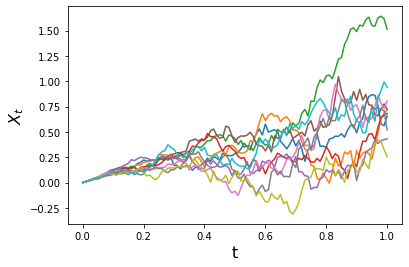

In [49]:
num_sim = 10

for i in range(num_sim):
  plt.plot(ts,run())

plt.xlabel('t', fontsize=16)
plt.ylabel(r'$X_t$',fontsize=16)
plt.show()